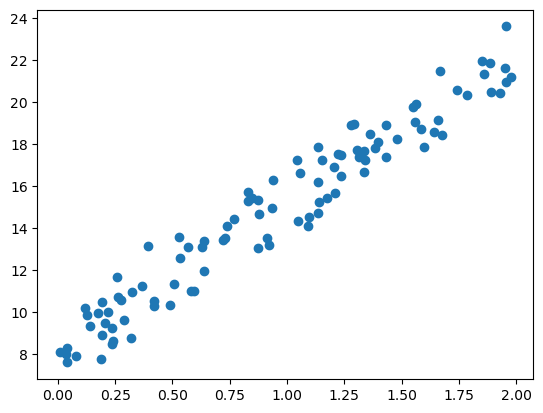

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 넘파이 시드 고정
np.random.seed(0)

# X 데이터 생성
X=2* np.random.rand(100,1)
# 원래답
# y1=6+4*X
y2=8+7*X + np.random.randn(100,1)

# w1 := 4, w0 := 6  
# plt.scatter(X,y1)
plt.scatter(X,y2)

plt.show()



In [2]:
# 오차를 구하는 함수
def get_cost(y,y_pred):
    N=len(y) # sample count
    cost=np.sum(np.square(y-y_pred)) / N # MSE
    return cost

In [3]:
# 각 weight(w0 , w1) 업데이트할 값을 반환하는 함수
# W1 = W1 - 학습율 * 업데이트값(미분)
def get_weight_updates(w1,w0, X,y,learning_rate=0.01):
    # sample count
    N=len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와
    # 동일한 크기를 가진 array 생성 -> 초기값 0
    w1_update=np.zeros(w1.shape[1])
    w0_update=np.zeros(w0.shape[1])
    
    # 예측값 계산 : y_pred => f(X)=W1*X + W0
    y_pred=np.dot(X,w1.T) + w0
    # 오차 
    diff=y-y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 
    # 모두 1값을 가진 행렬 생성
    w0_factors=np.ones((N,1)) 
    
    # w1과 w0을 업데이트할 w1_update, w0_update 계산
    w1_update=-(2/N) * learning_rate * (np.dot(X.T,diff))
    w0_update=-(2/N) * learning_rate * (np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [4]:
# 오차가 최소인 w1, w2 값을 구하는 함수
def gradient_descent_steps(X,y,iters=10000):
    w0=np.zeros((1,1))
    w1=np.zeros((1,1))
    
    for ind in range(iters):
        w1_update, w0_update=get_weight_updates(w1,w0,X,y,learning_rate=0.01)
        w1=w1-w1_update # 수정
        w0=w0-w0_update
    return w1, w0
    

In [5]:
w1, w0 = gradient_descent_steps(X,y2,iters=10000)
# w1 := 4, w0 := 6
print(f'W1 : {w1}, W0 : {w0}')

W1 : [[6.96846751]], W0 : [[8.22215108]]


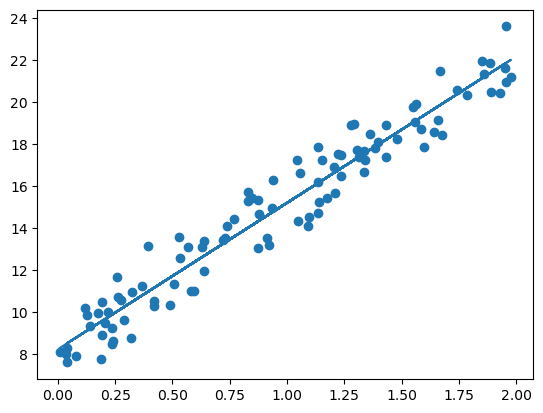

In [6]:
pred=w1[0,0]*X + w0
plt.scatter(X,y2)
plt.plot(X,pred)
plt.show()
